In [2]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filenames = [
    fn for fn in os.listdir(".")
    if fn.endswith(".json")
]

In [4]:
data = {}
for fn in filenames:
    with open(fn) as f:
        split = fn.split("_")
        sample, engine = split[: 2]
        is_decoy = split[2] == "decoy"
        data[(sample, engine, is_decoy)] = json.load(f)
len(data)

72

In [5]:
features = list(data[("A1", "xtandem", False)][0].keys())
features

['REP:siblingSearches',
 'REP:siblingSearchesTop',
 'REP:siblingModifications',
 'REP:siblingModificationsTop',
 'REP:siblingIons',
 'REP:siblingIonsTop',
 'REP:replicateSpectra',
 'REP:siblingExperiments']

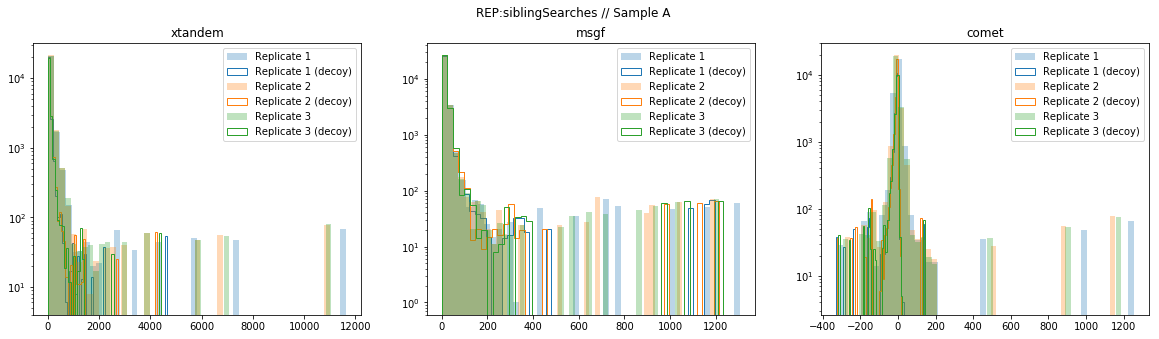

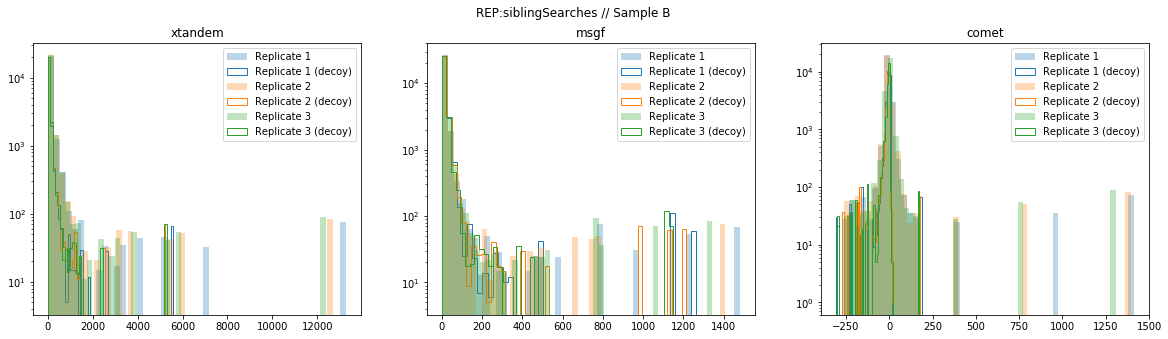

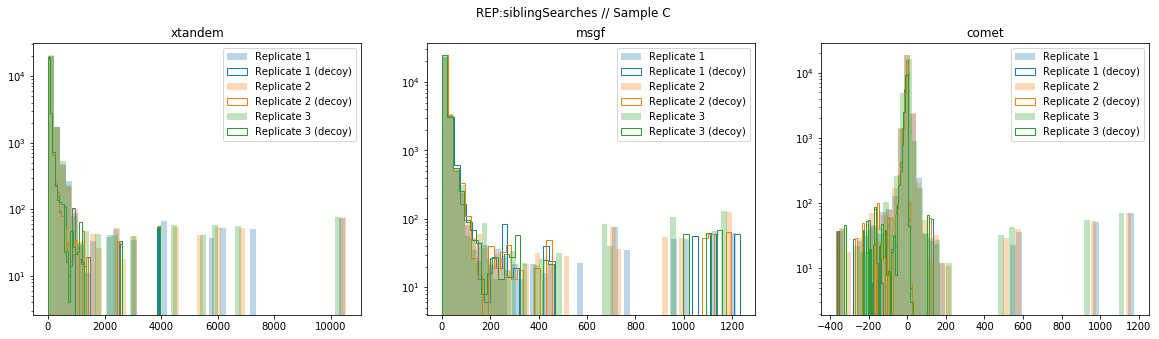

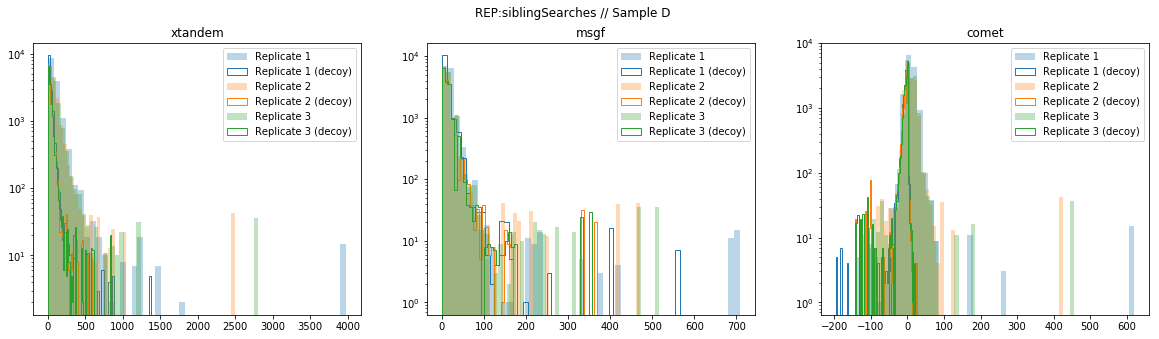

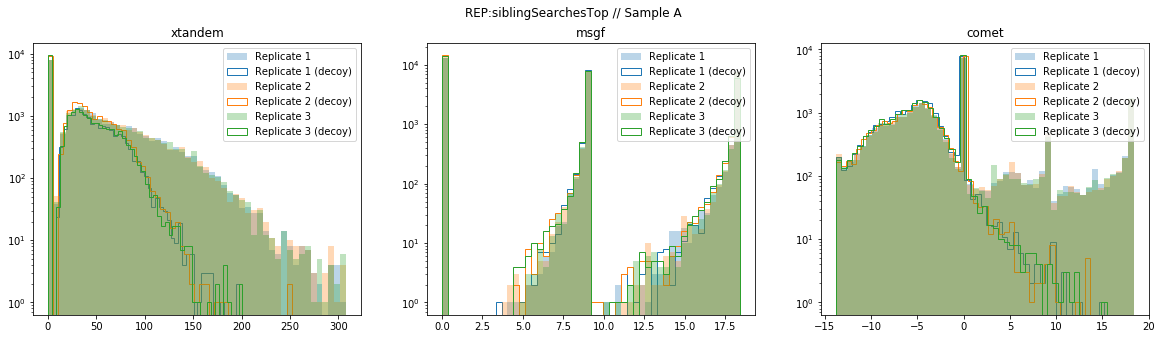

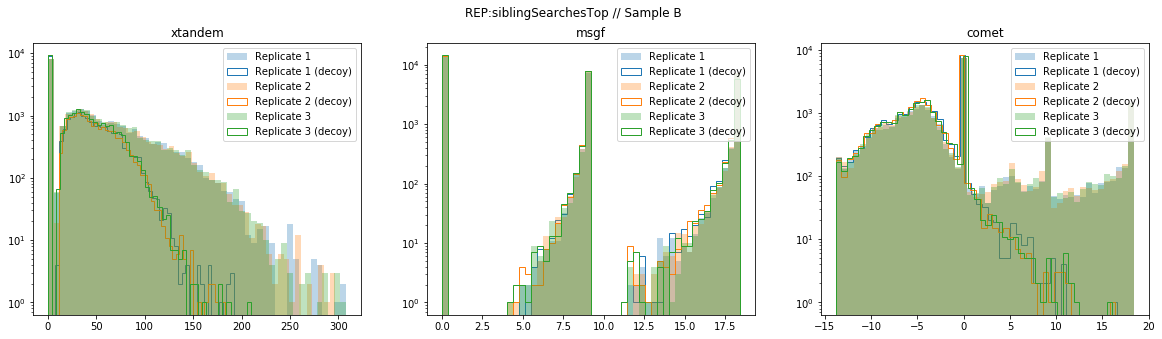

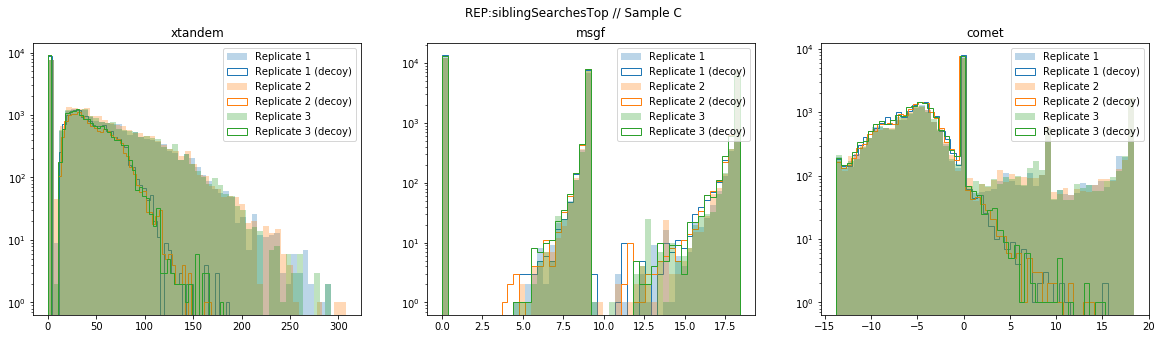

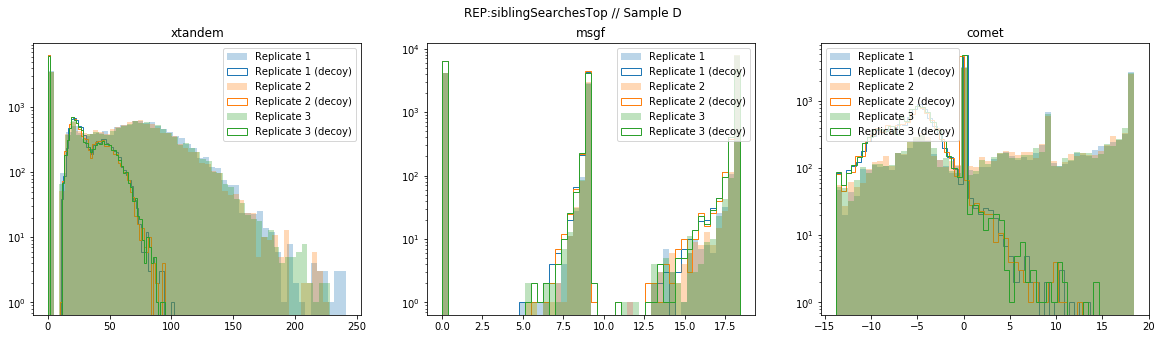

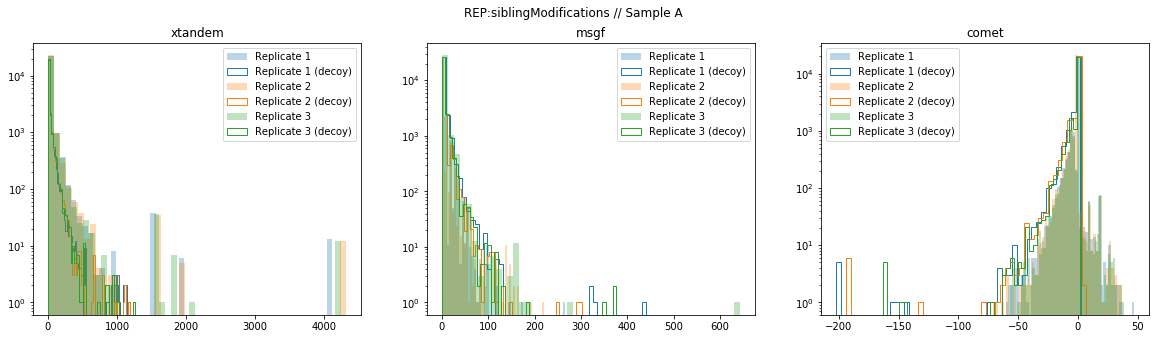

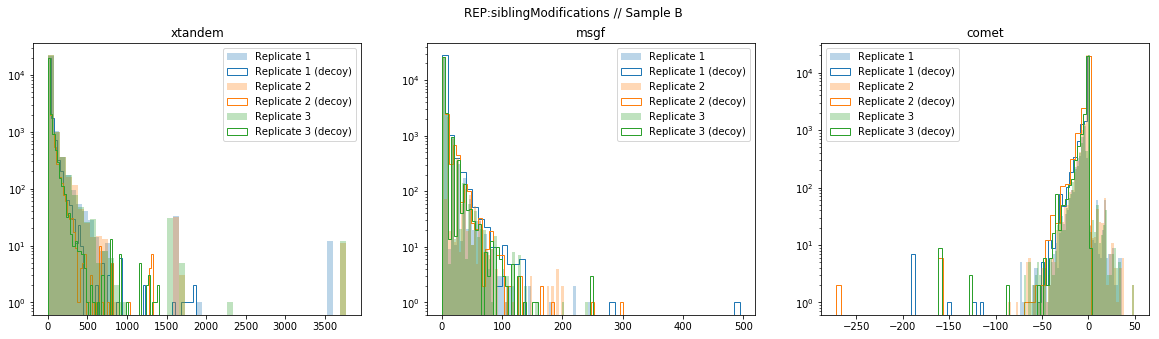

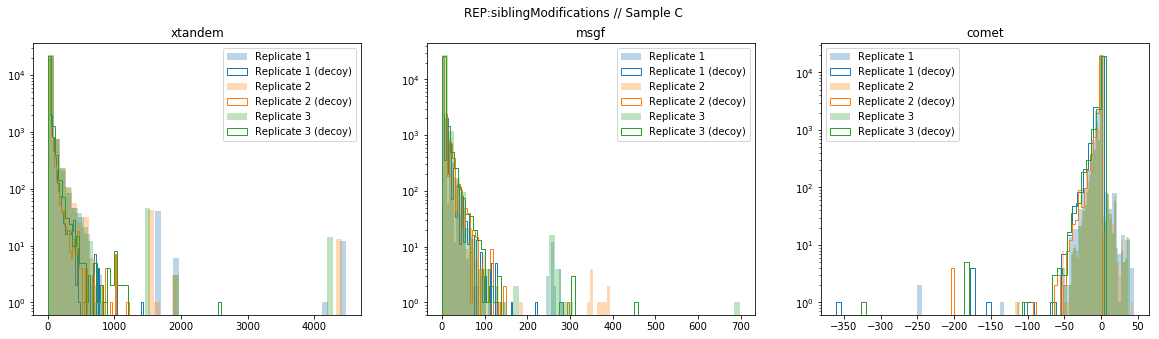

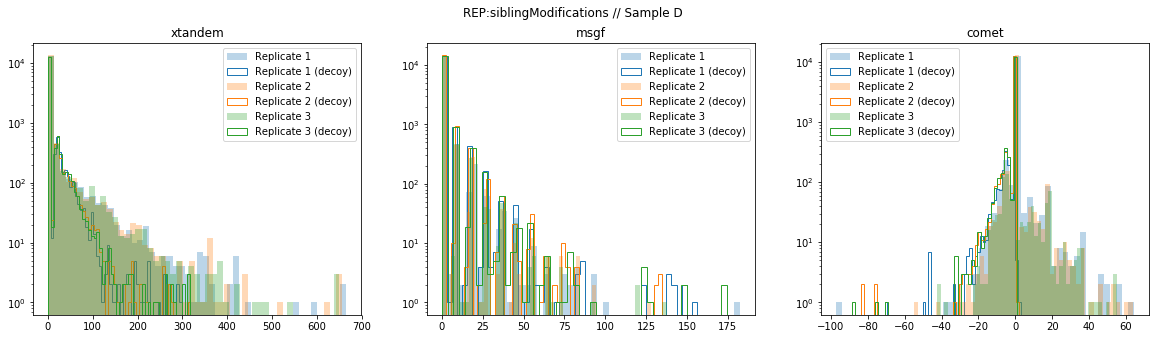

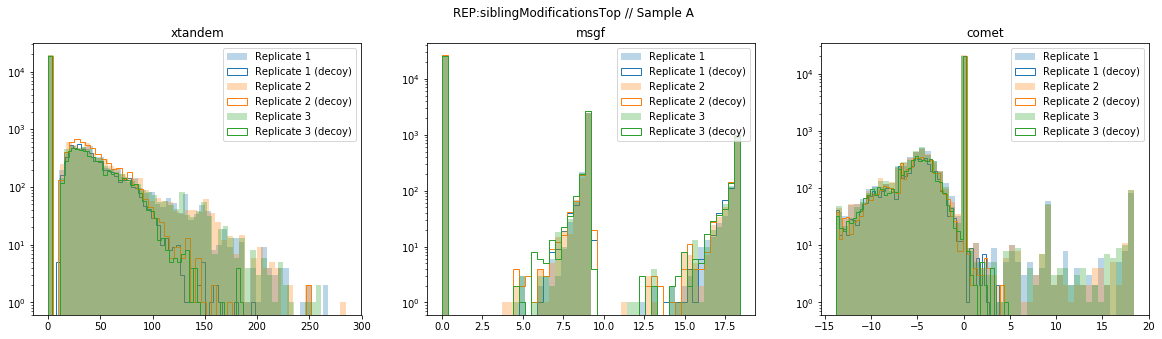

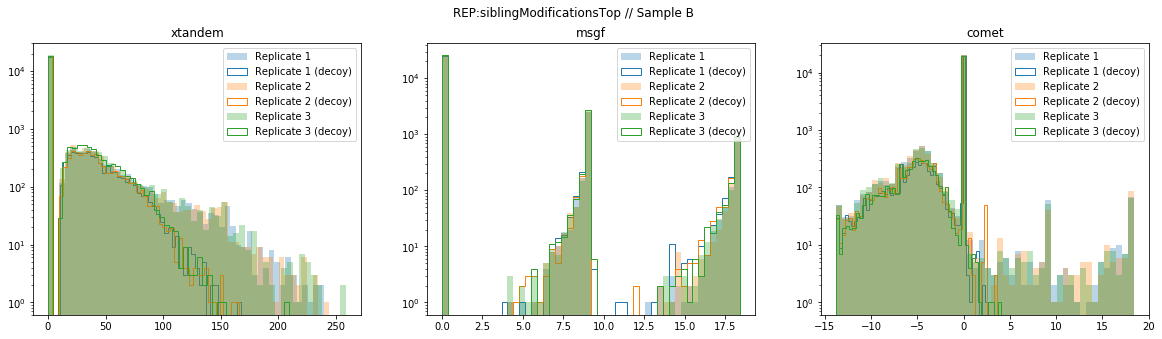

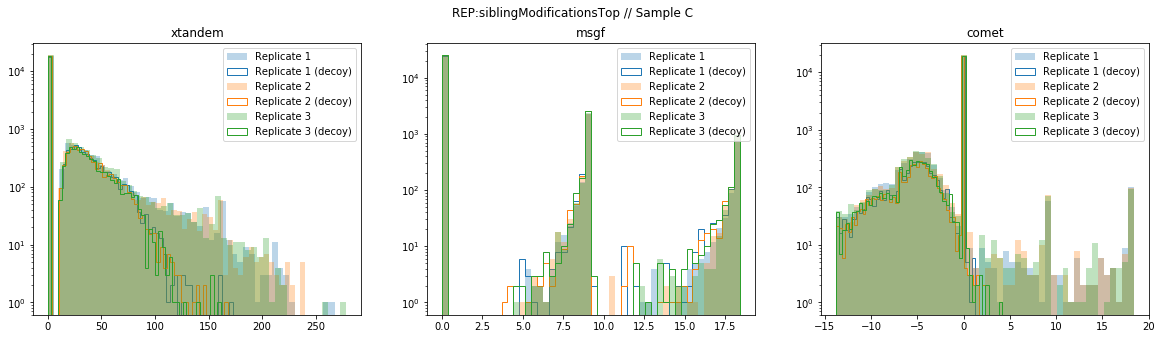

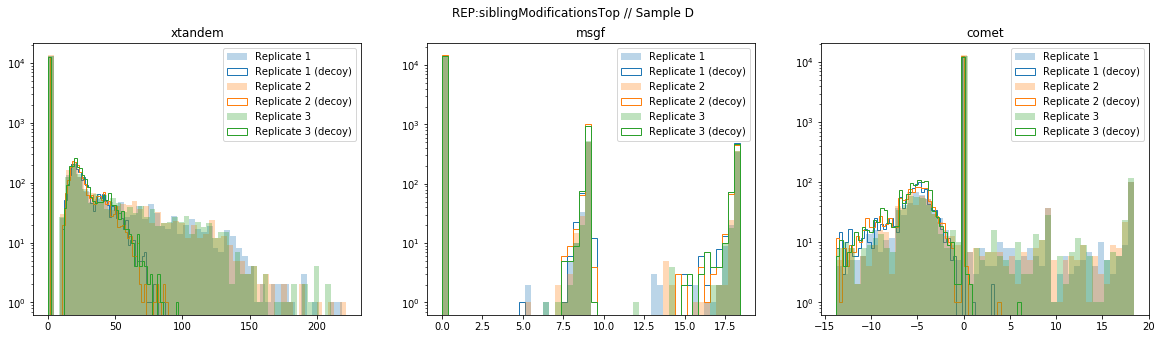

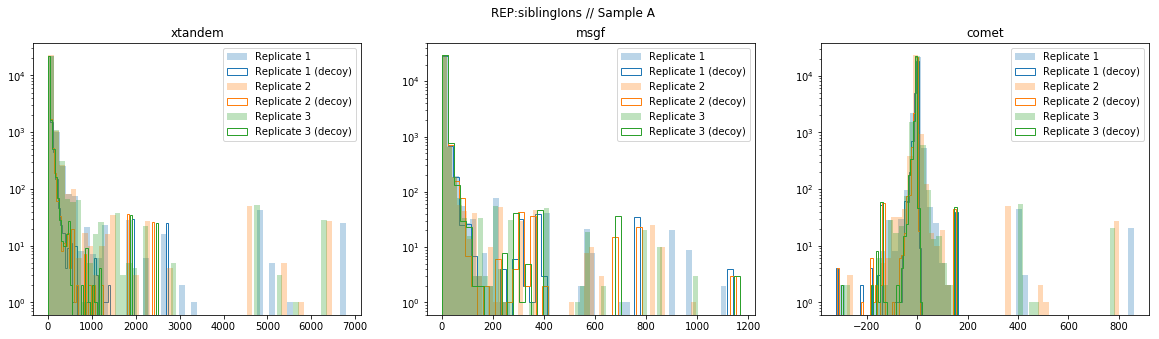

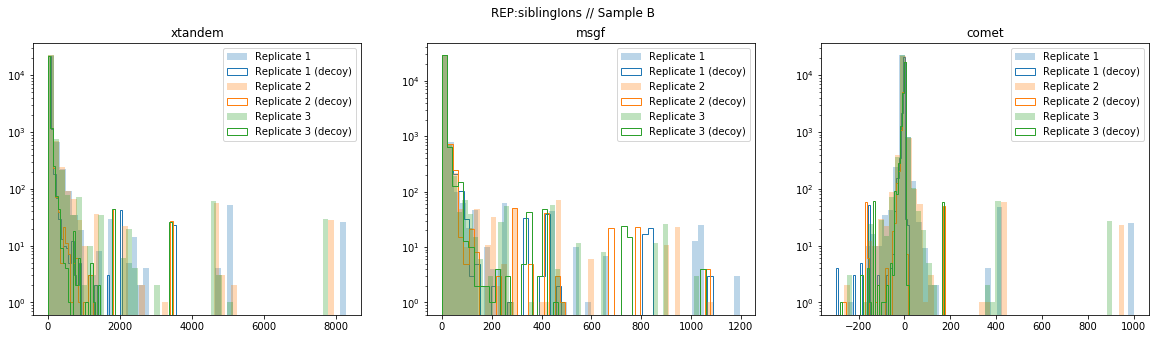

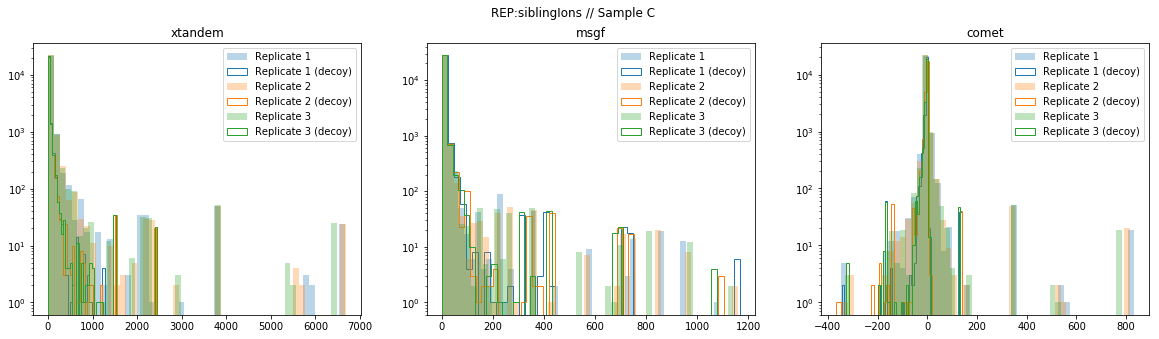

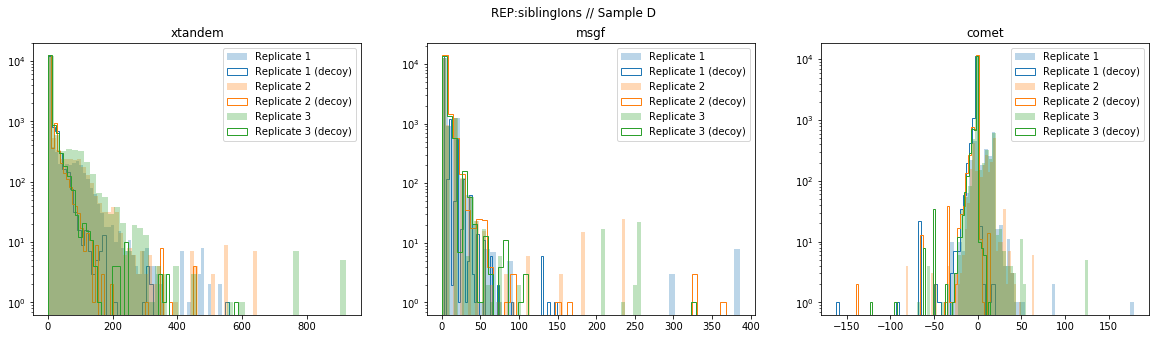

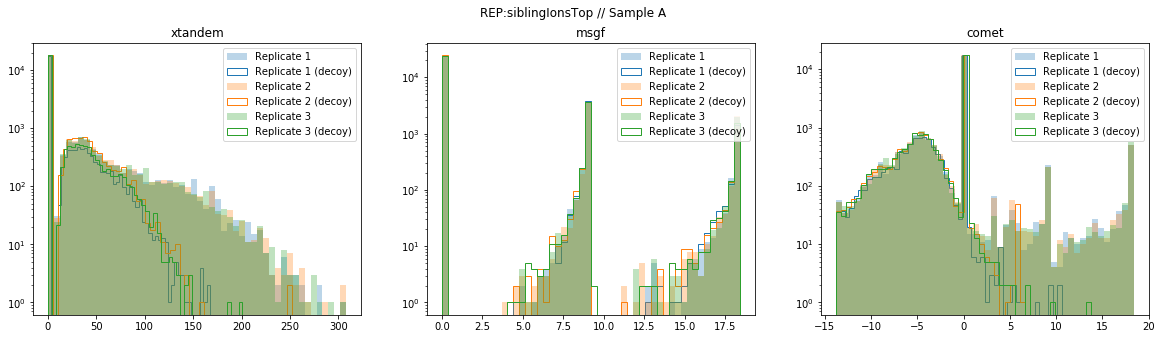

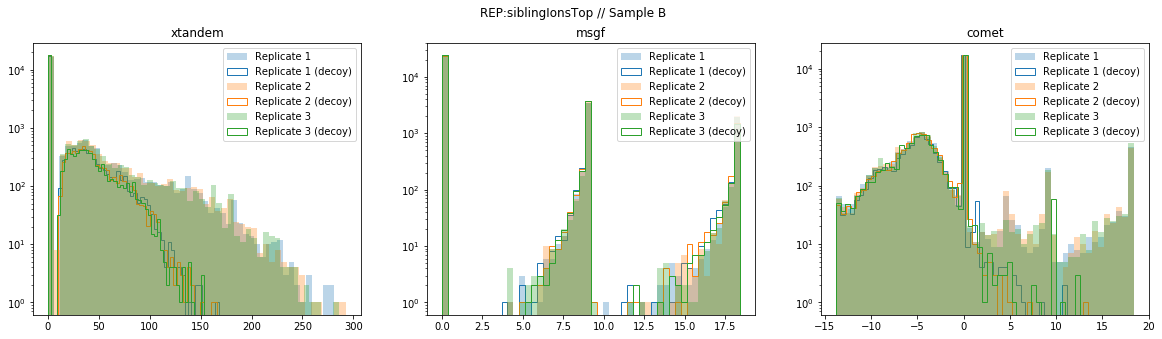

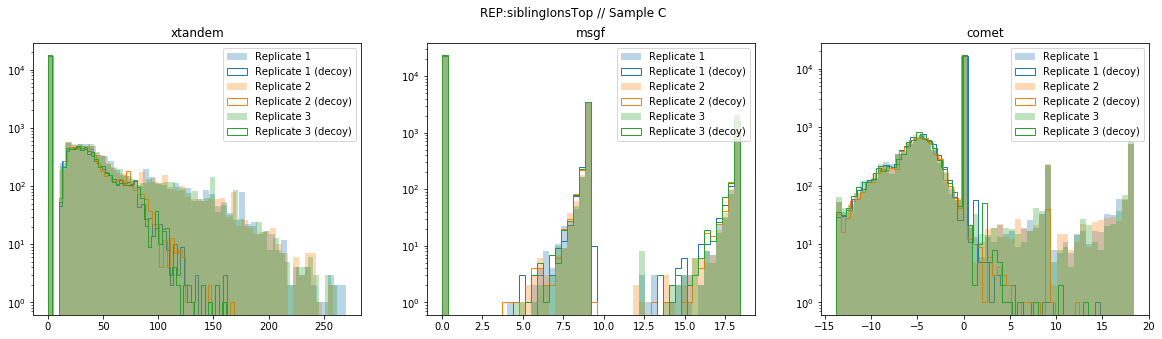

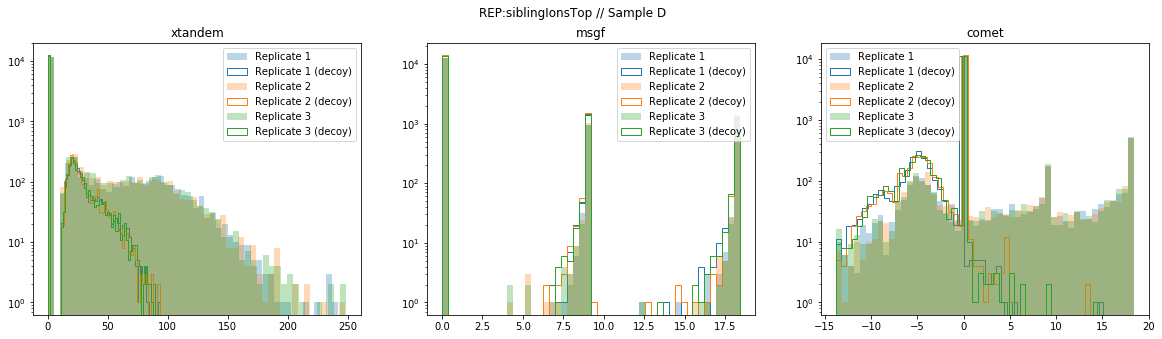

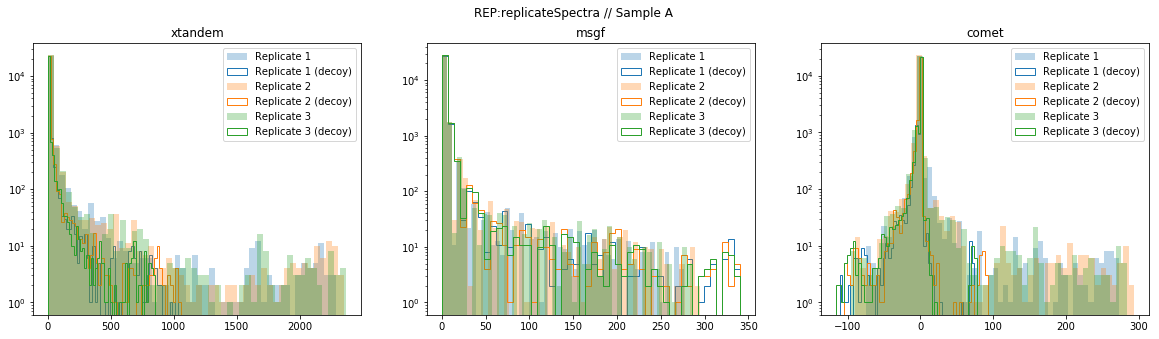

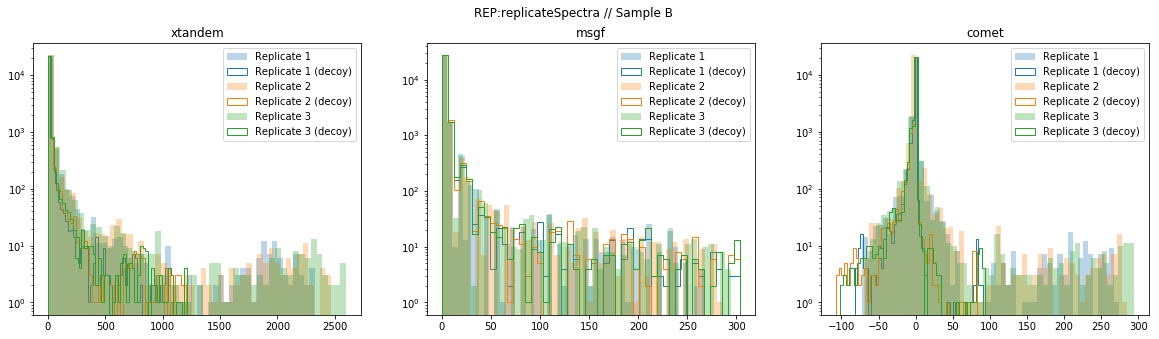

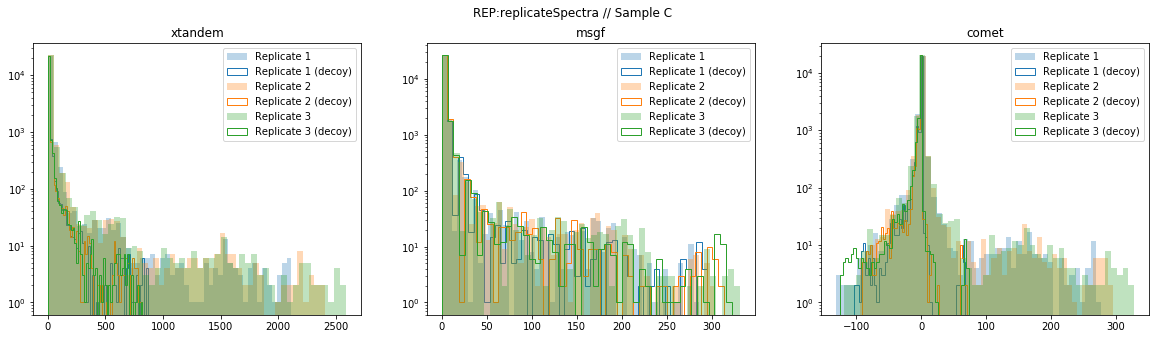

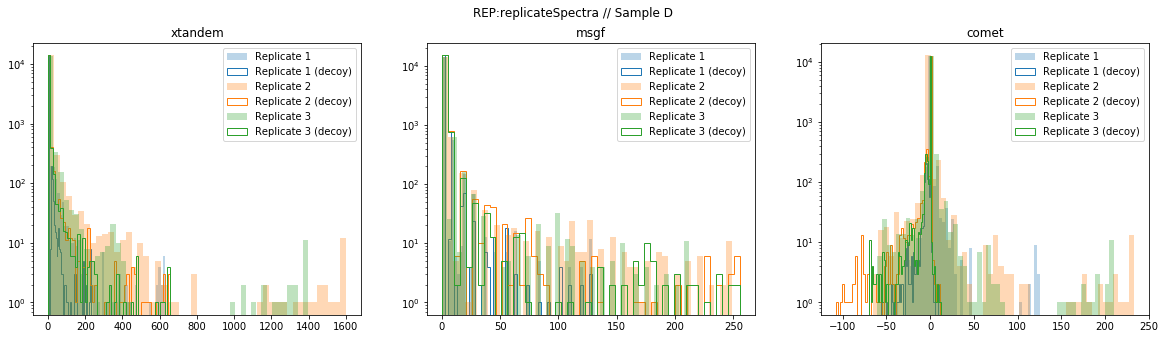

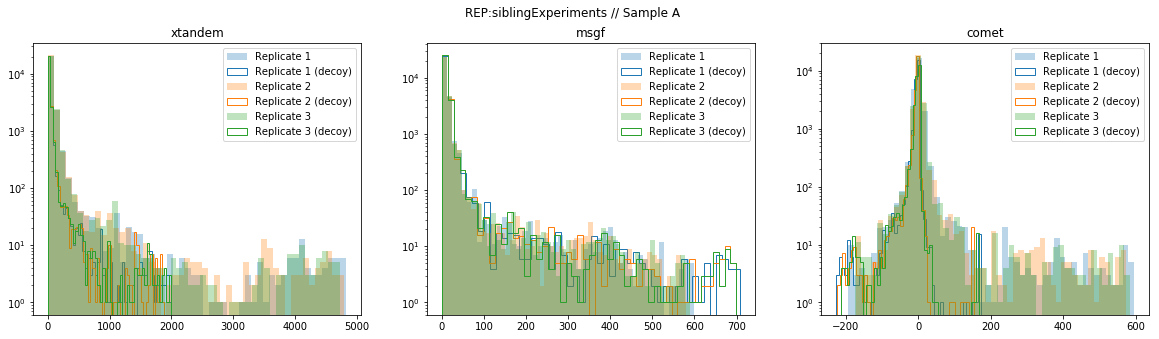

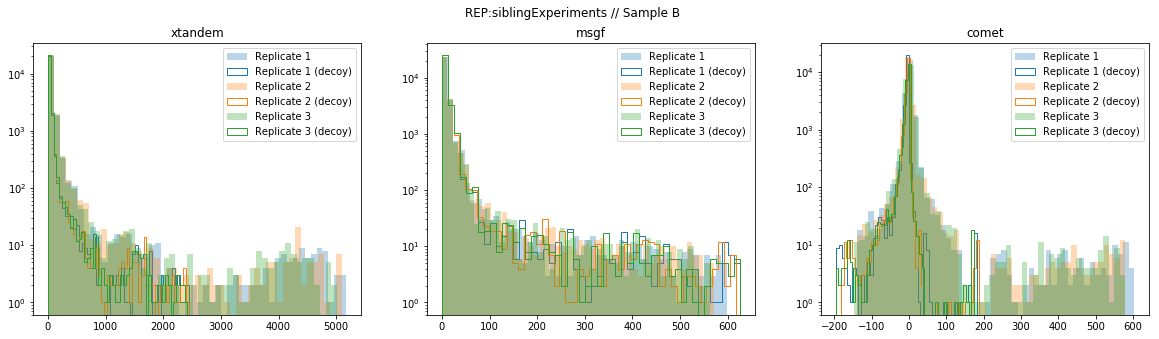

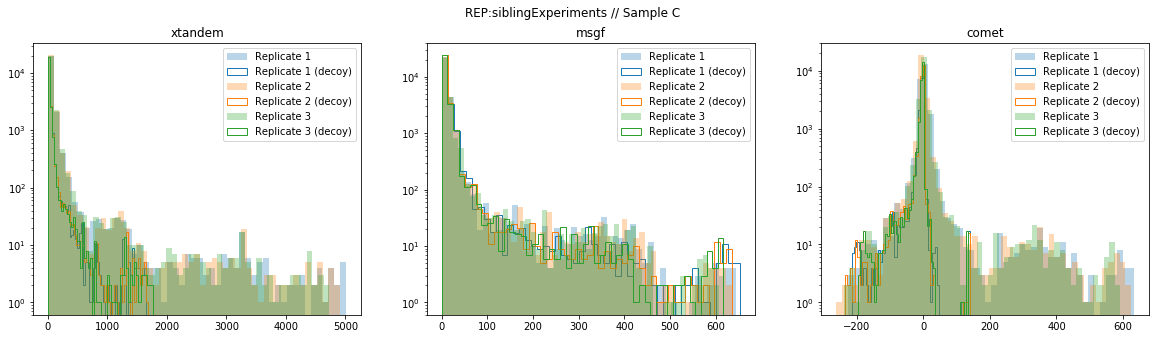

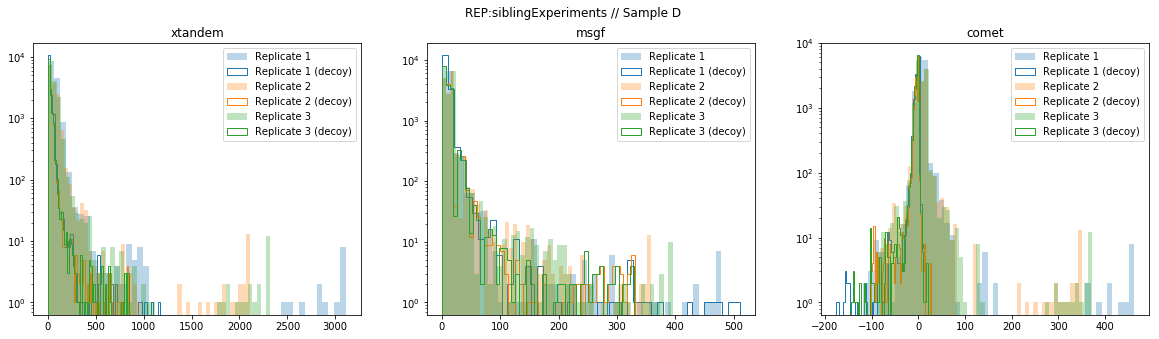

In [12]:
for feature in features:
    for sample in list("ABCD"):
        fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
        for i, search_engine in enumerate(["xtandem", "msgf", "comet"]):
            for c, num in enumerate(list("123")):
                for is_decoy in [False, True]:
                    d = data[(sample + num, search_engine, is_decoy)]
                    vals = [item[feature] for item in d]
                    label = "Replicate " + num
                    if is_decoy:
                        label += " (decoy)"
                        axarr[i].hist(vals, label=label, bins=50, color="C" + str(c), histtype="step")
                    else:
                        axarr[i].hist(vals, label=label, bins=50, alpha=0.3, color="C" + str(c))
                    axarr[i].set_title(search_engine)
                    axarr[i].legend()
            axarr[i].set_yscale('log', nonposy='clip')
        plt.suptitle("{} // Sample {}".format(feature, sample))
        plt.show(fig)
        plt.close(fig)

Problem: The target ones also contain false positives...

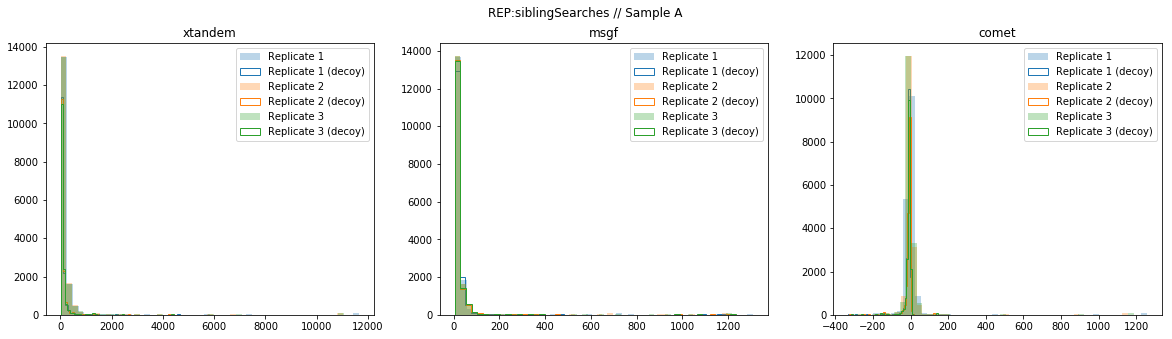

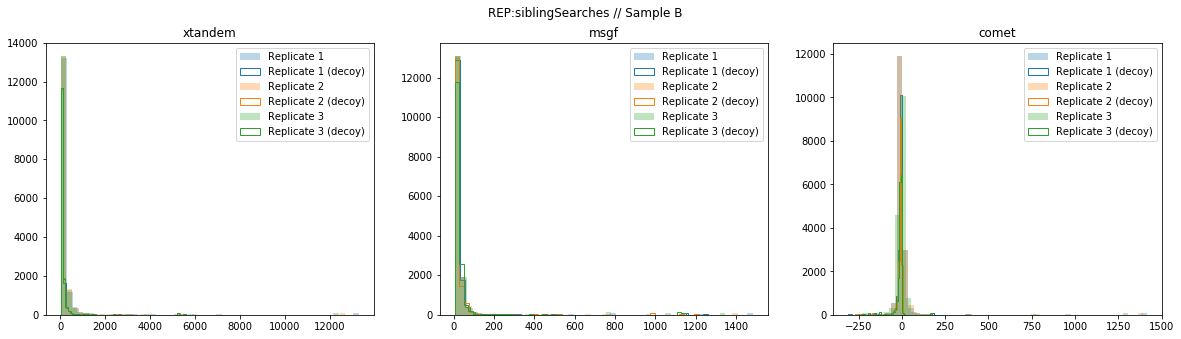

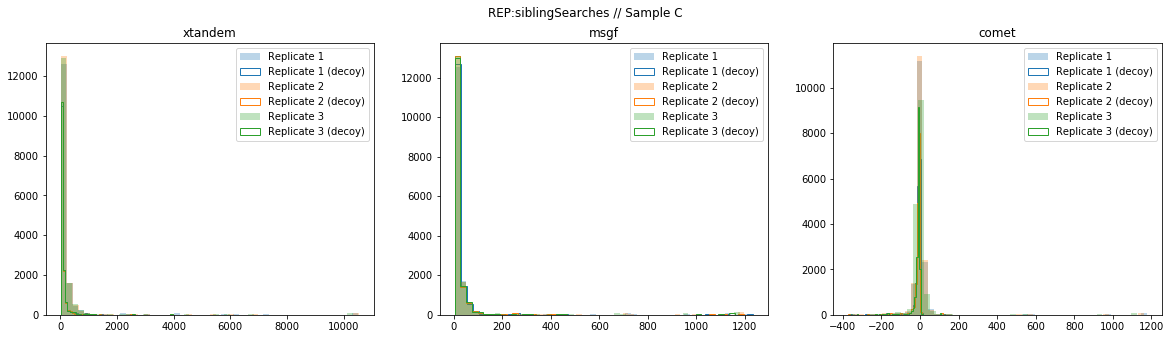

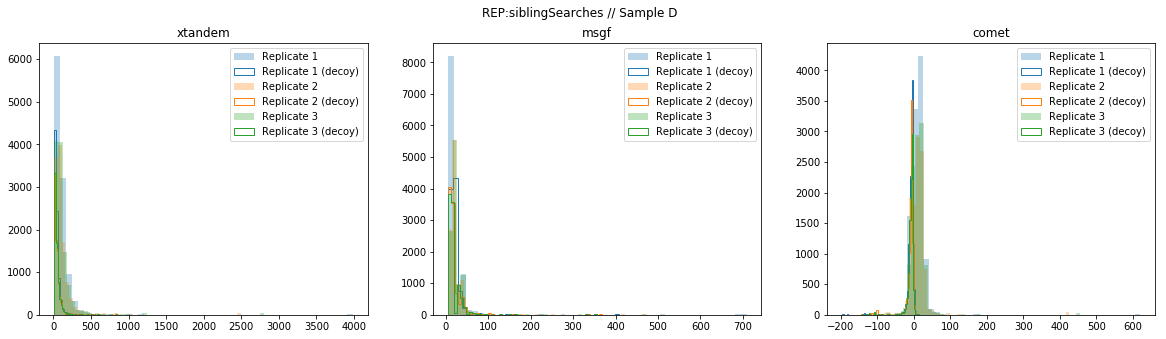

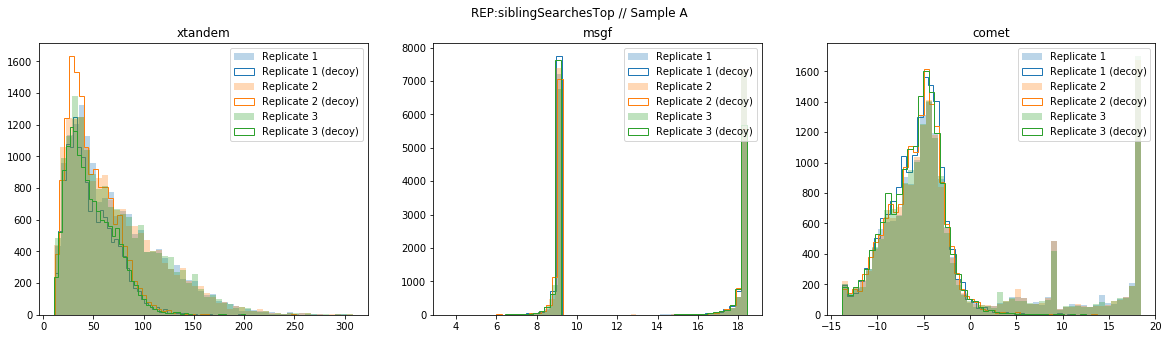

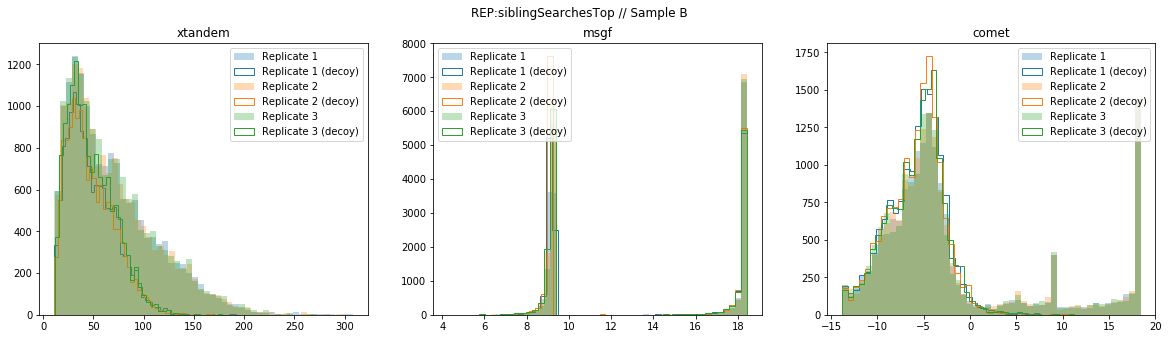

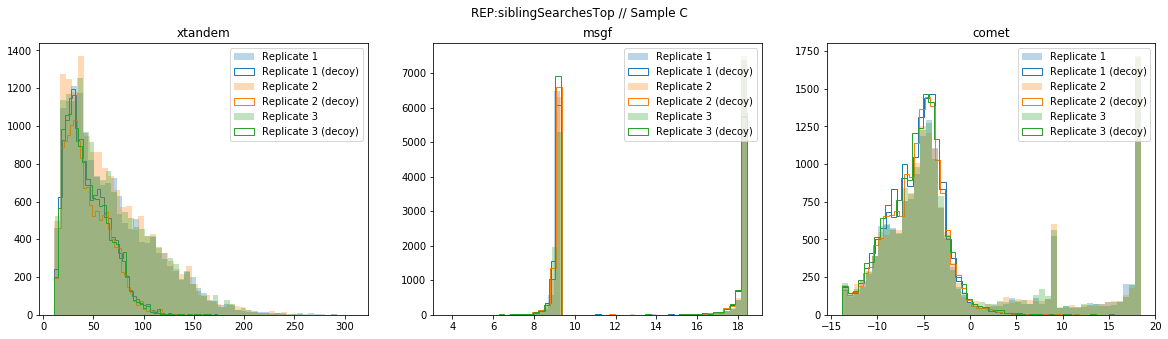

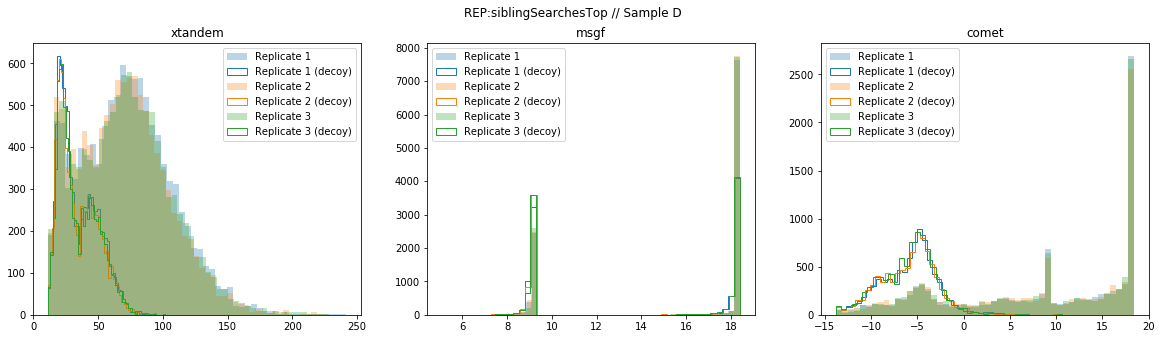

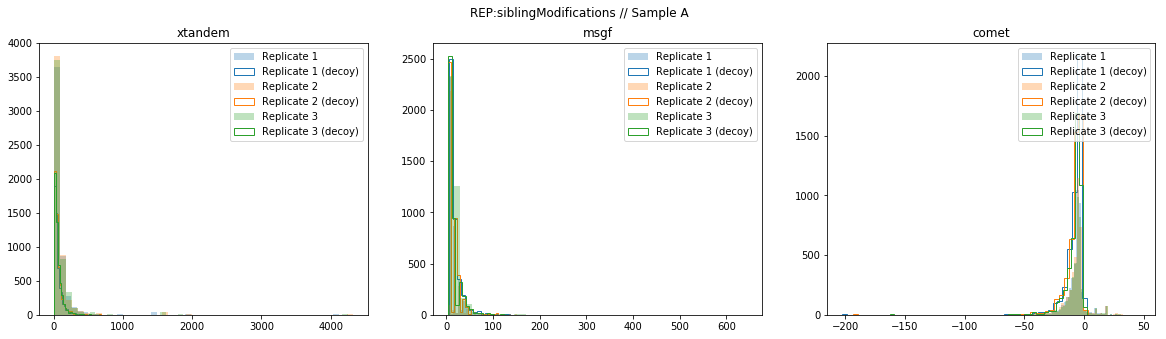

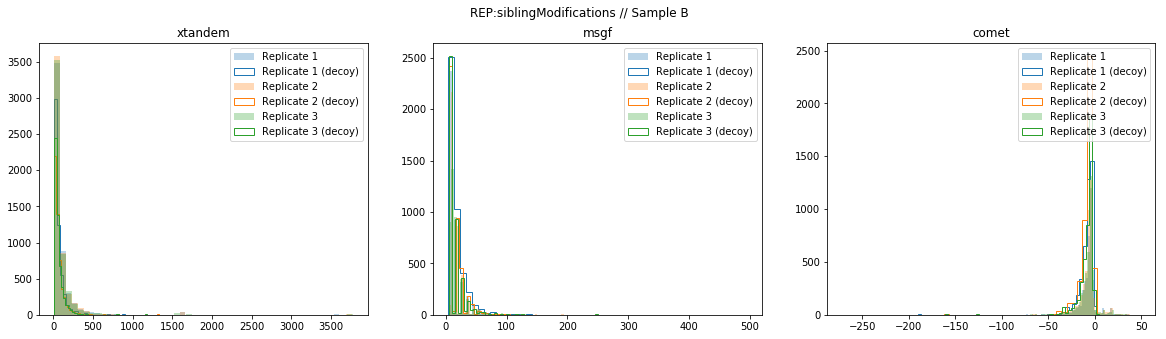

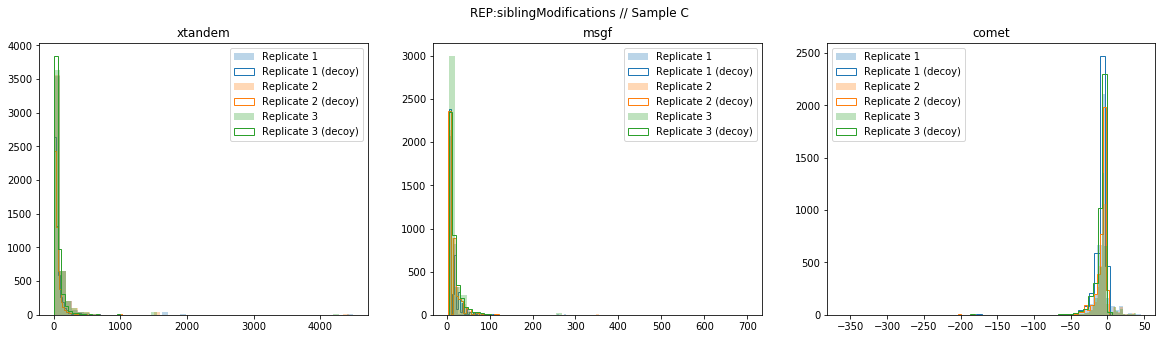

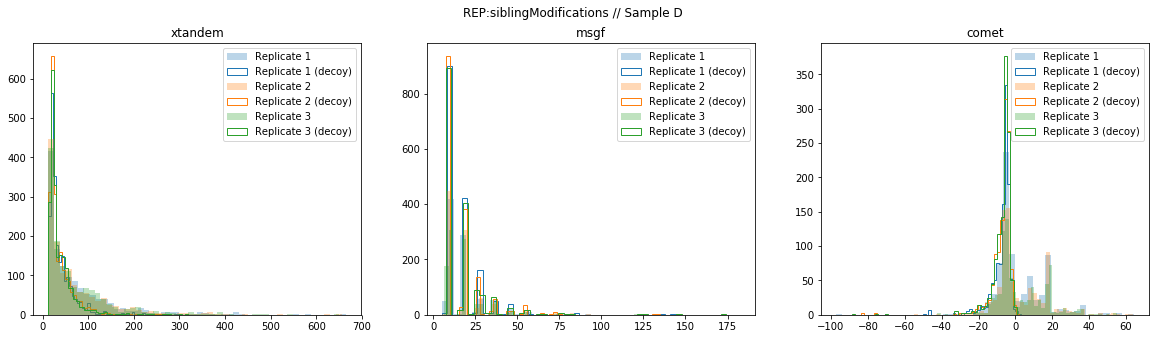

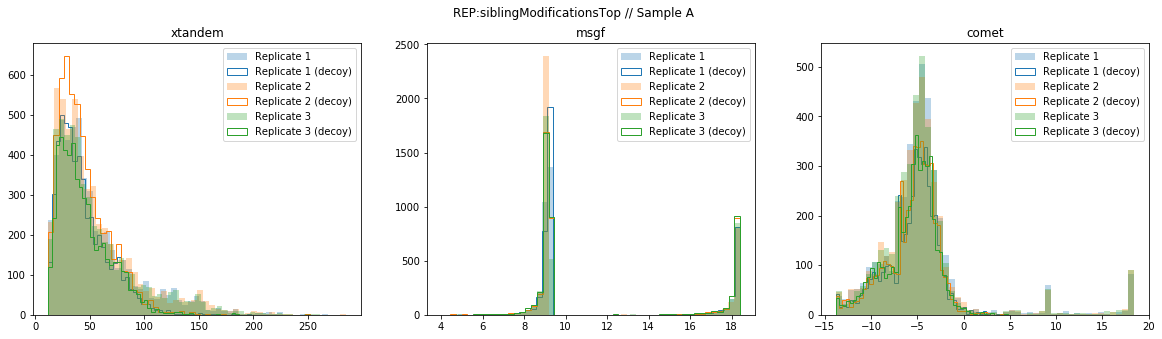

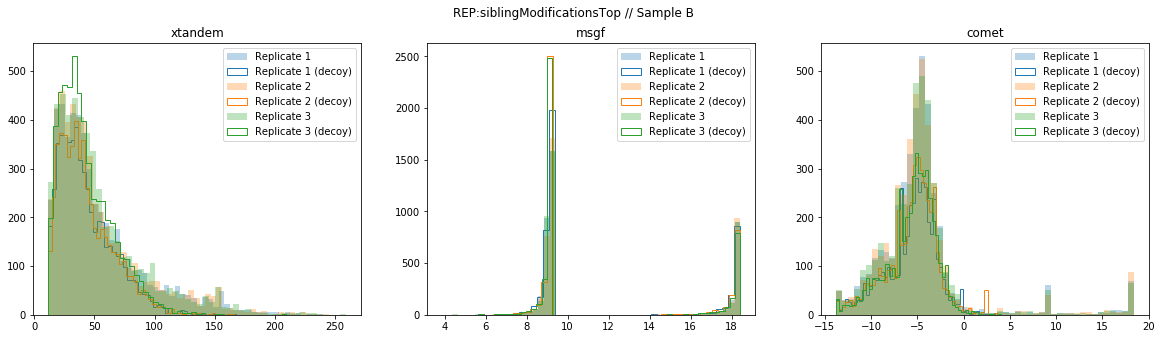

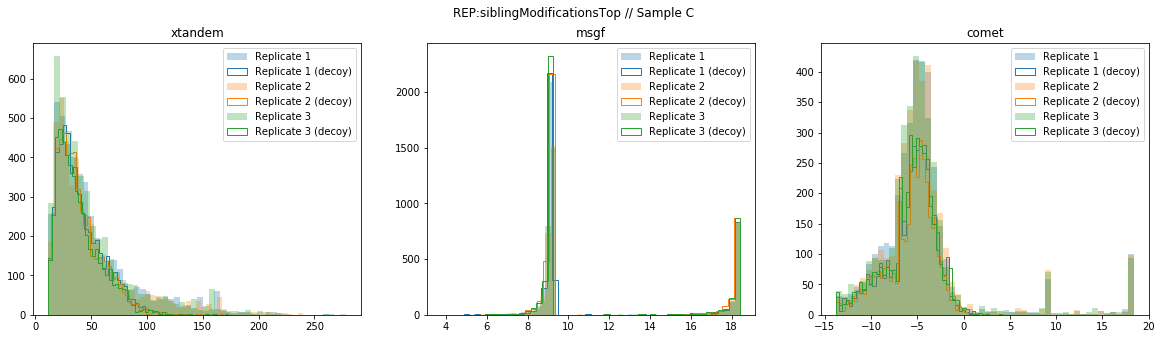

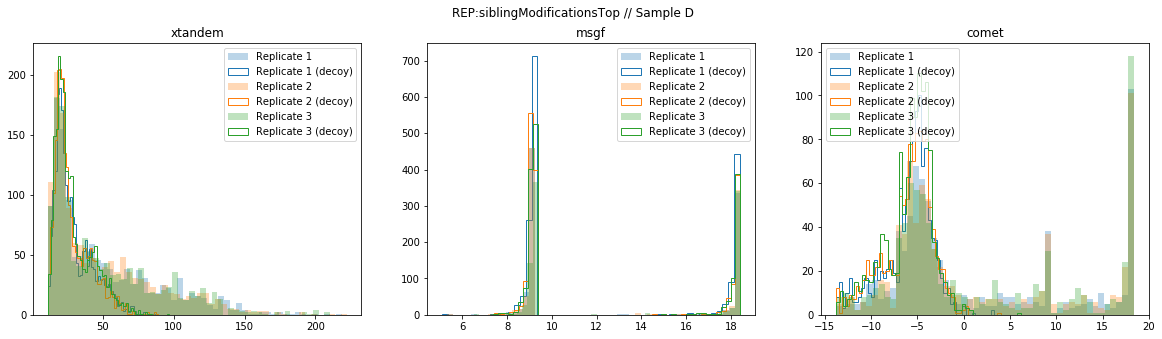

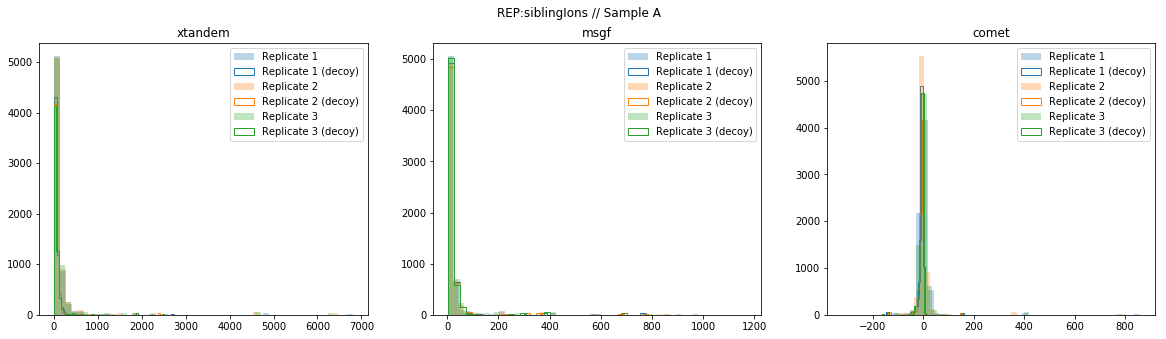

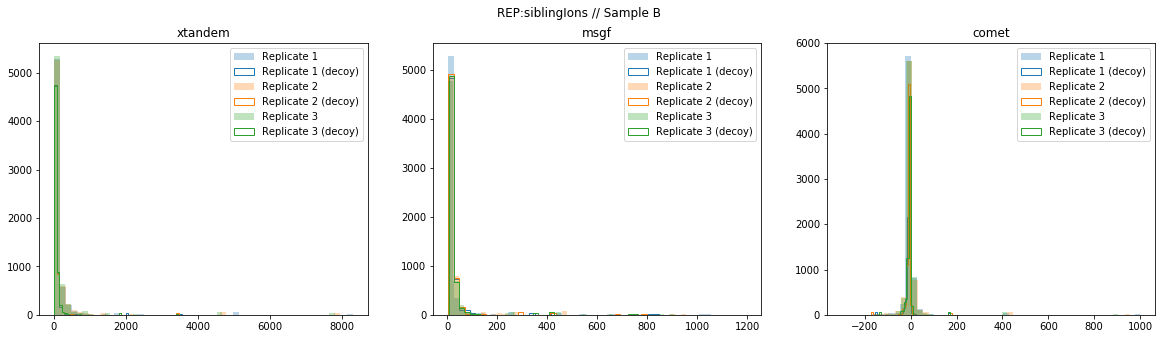

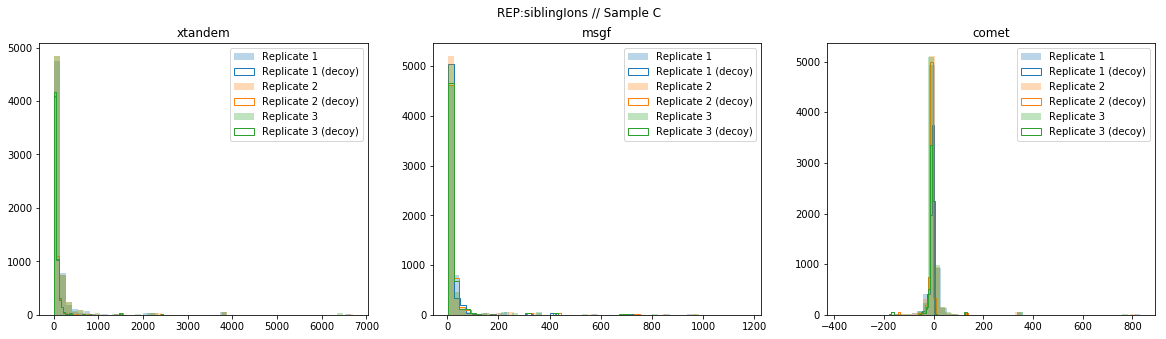

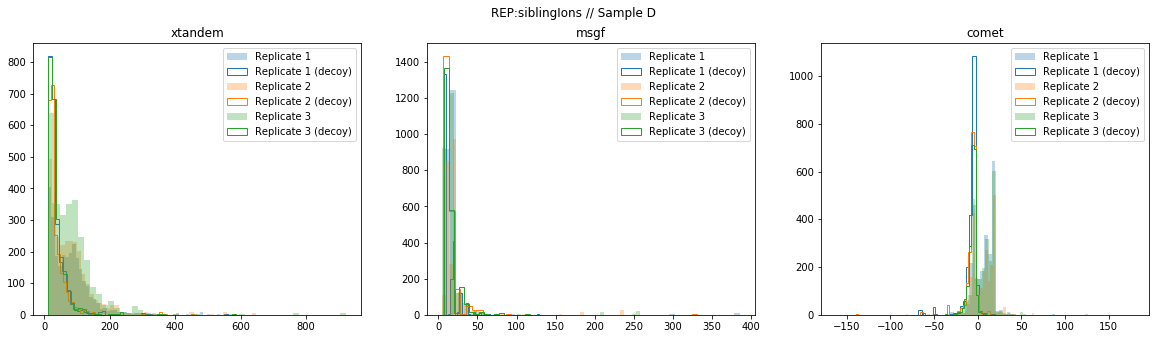

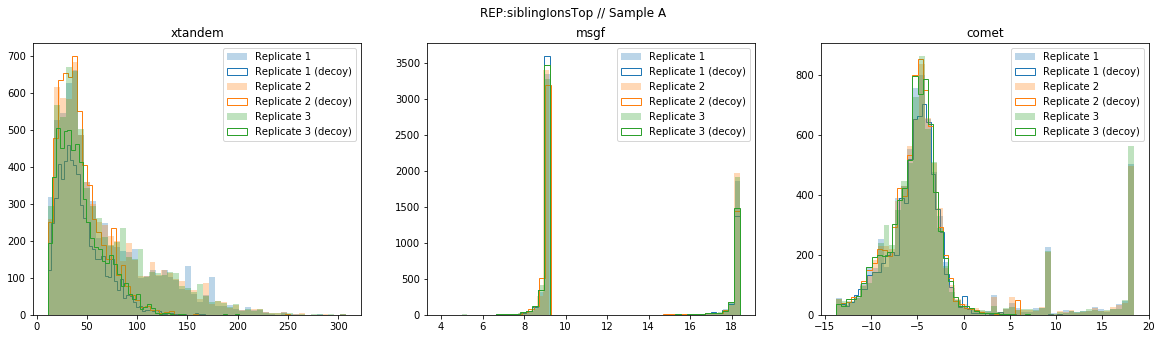

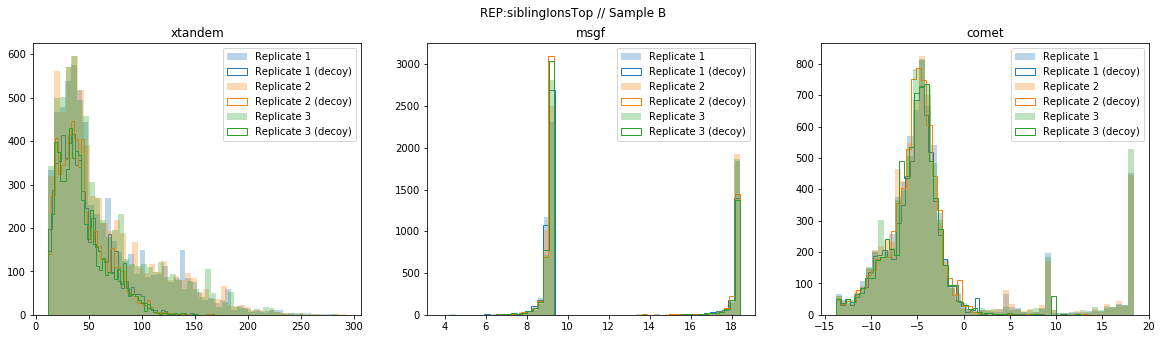

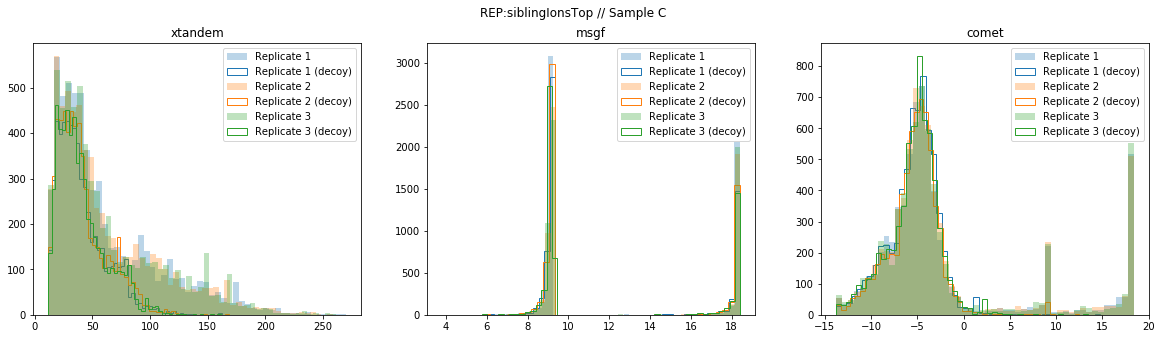

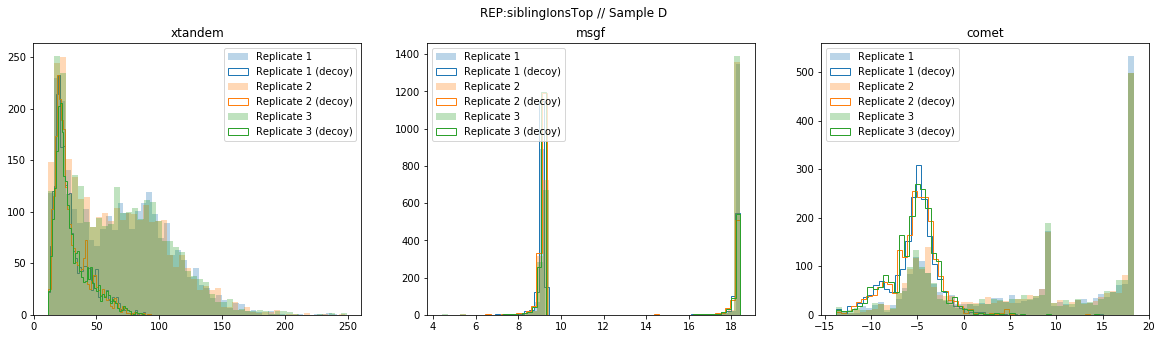

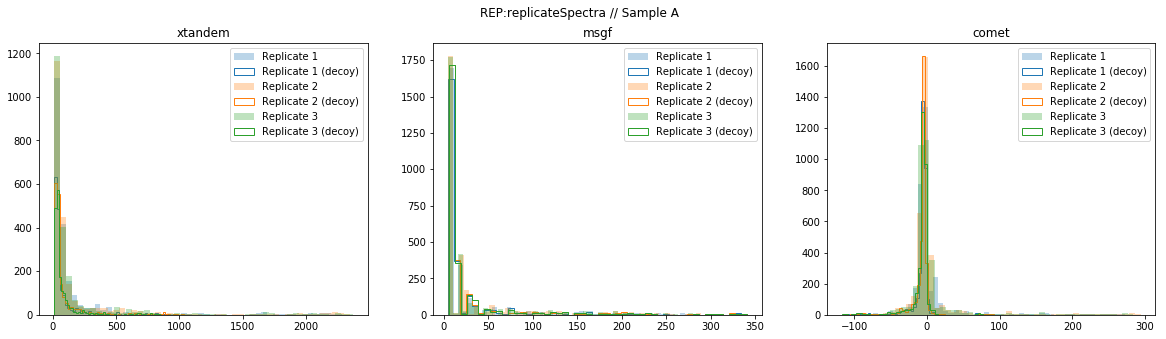

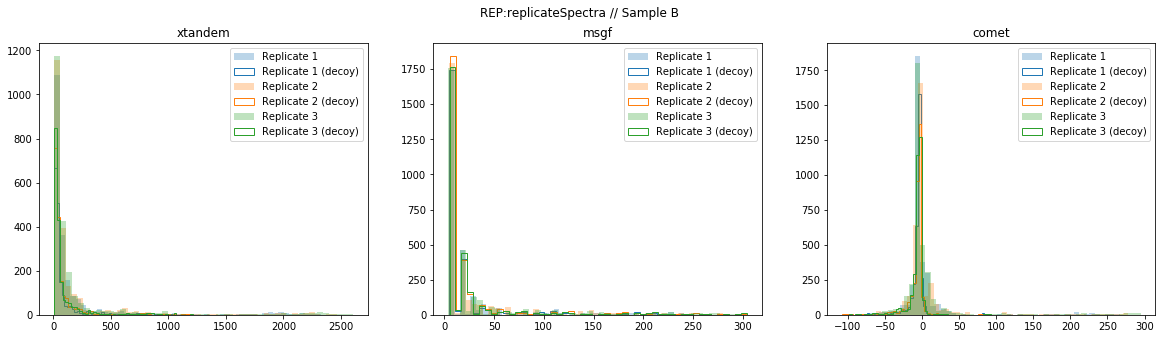

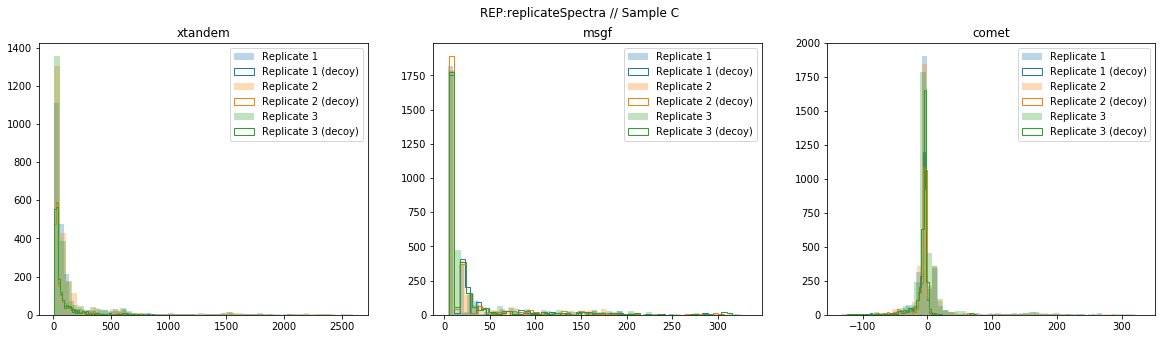

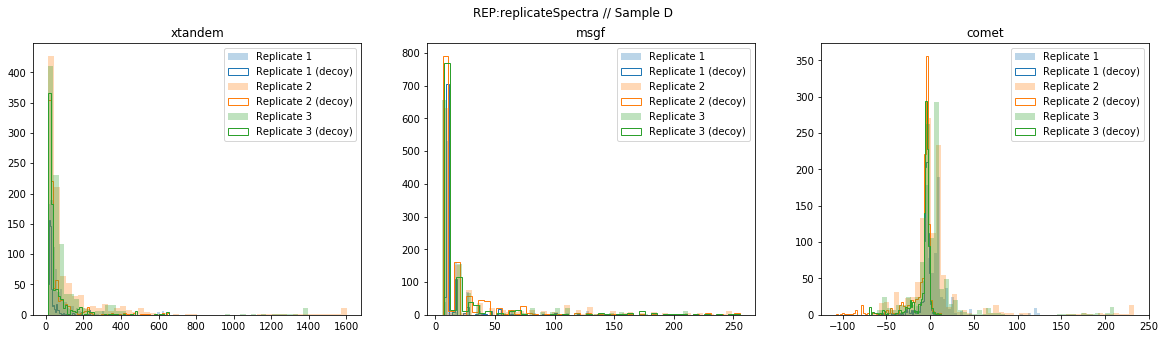

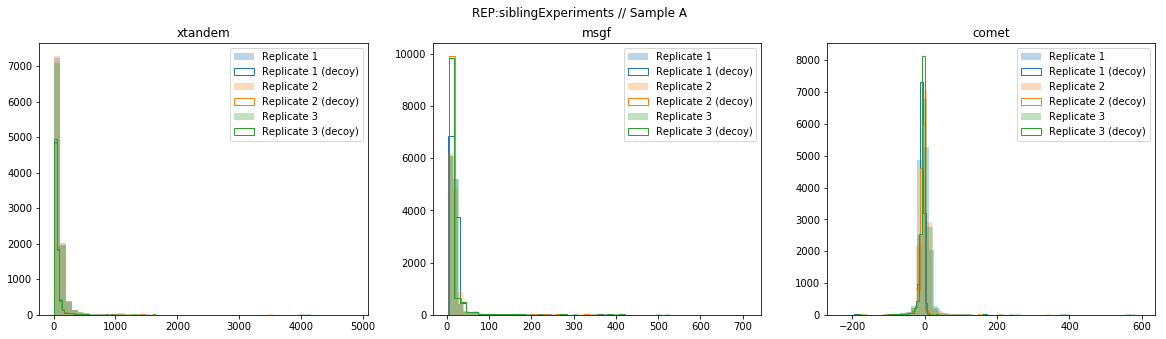

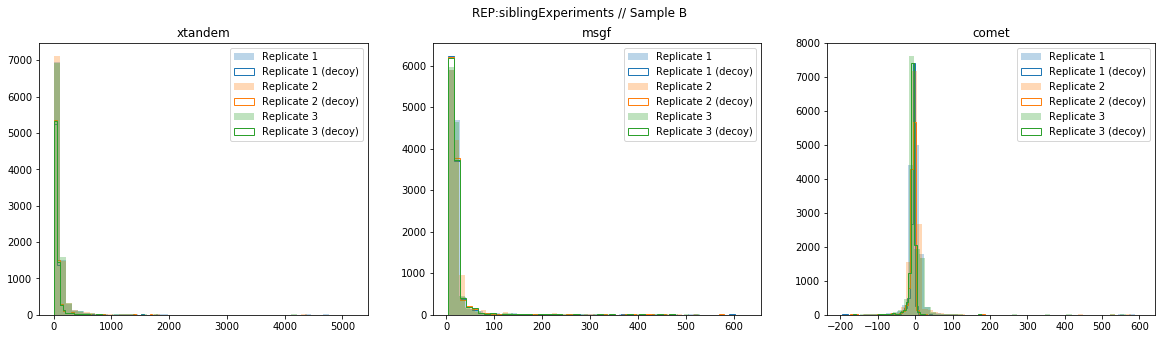

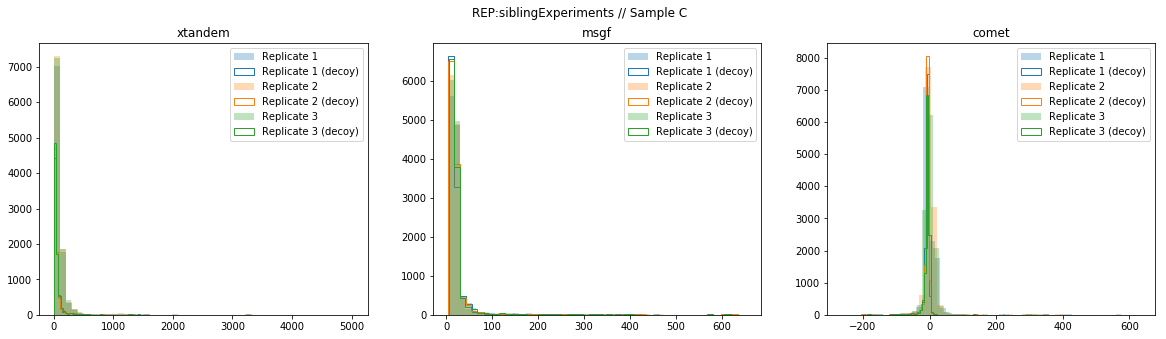

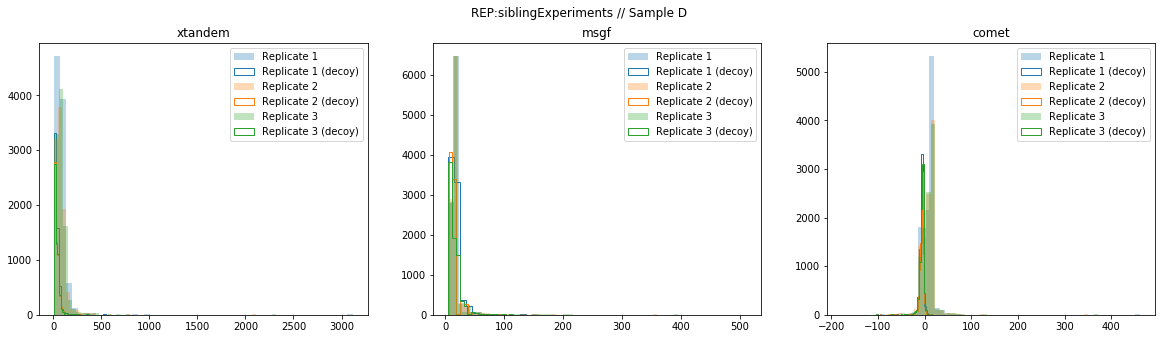

In [14]:
# exclude zeros..
for feature in features:
    for sample in list("ABCD"):
        fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
        for i, search_engine in enumerate(["xtandem", "msgf", "comet"]):
            for c, num in enumerate(list("123")):
                for is_decoy in [False, True]:
                    d = data[(sample + num, search_engine, is_decoy)]
                    vals = [item[feature] for item in d]
                    vals = [v for v in vals if v != 0]
                    label = "Replicate " + num
                    if is_decoy:
                        label += " (decoy)"
                        axarr[i].hist(vals, label=label, color="C" + str(c), bins=50, histtype="step")
                    else:
                        axarr[i].hist(vals, label=label, alpha=0.3, color="C" + str(c), bins=50)
                    axarr[i].set_title(search_engine)
                    axarr[i].legend()
        plt.suptitle("{} // Sample {}".format(feature, sample))
        plt.show(fig)
        plt.close(fig)